In [60]:
# Data Source: https://www.drivendata.org/competitions/57/nepal-earthquake/page/135/

<br><p style="font-family: Arial; font-size:3.75em;color:blue; font-style:bold">
FinalProject <br> <br> <br>Predicting Seismic Vulnerability of Buildings in Nepal </p><br><br>

# Step 1: Initial exploration of the Dataset

In [61]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [62]:
# Read training data
data = pd.read_csv('./train_values.csv')
data.shape 

(260601, 39)

In [63]:
# Read table with target variable 
label=pd.read_csv('./train_labels.csv')
label.shape

(260601, 2)

In [64]:
data.shape[0] #number of rows

260601

In [65]:
data.shape[1] #number of columns

39

In [66]:
# Add Target variable to training data 

data['damage']=label['damage_grade']

### Are there any Null values?

In [67]:
# Check if there are NaN values
data.isnull().any()

building_id                               False
geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick  

In [68]:
data.isnull().any(axis=1)
#filtering option

0         False
1         False
2         False
3         False
4         False
          ...  
260596    False
260597    False
260598    False
260599    False
260600    False
Length: 260601, dtype: bool

In [69]:
data.isnull().any(axis=1).any()
#filtering option for all

False

In [70]:
# How many unique indicators are there ? (should be the same #)
indicators = data['building_id'].unique().tolist()
len(indicators)

260601

Explore what data set holds in

In [71]:
data.head(3)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3


In [72]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

### Are there any duplicated values?

In [73]:
# Check if there are any duplicated values
data.duplicated().any()

False

# Step 2: Initial plot to for better understanding the data

### Explore the distribution of values

#### Target variable distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target distribution')

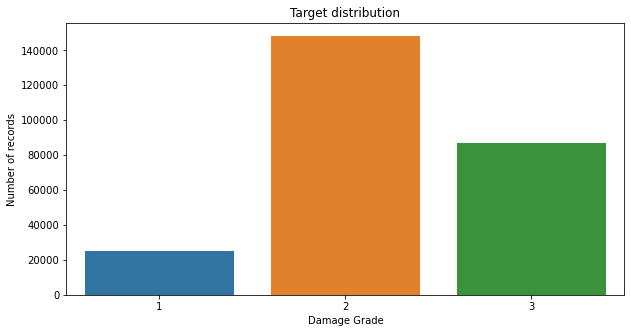

In [75]:
plt.rcParams["figure.figsize"] = (10,5)
sb.countplot(label['damage_grade'])
plt.xlabel('Damage Grade')
plt.ylabel('Number of records')
plt.title('Target distribution')

The training data is imbalanced. 

#### Building age distribution

Text(0.5, 1.0, 'Distribution of age')

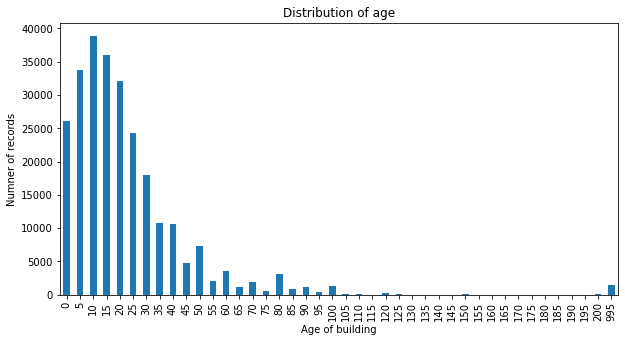

In [76]:
plt.rcParams["figure.figsize"] = (10,5)
data['age'].value_counts().sort_index().plot.bar()
plt.xlabel('Age of building')
plt.ylabel('Numner of records')
plt.title('Distribution of age')

Text(0, 0.5, 'Numner of records')

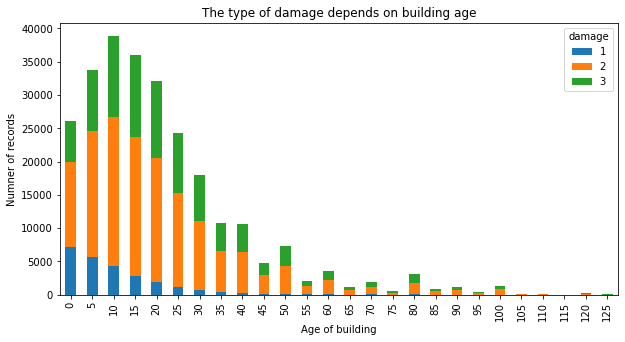

In [77]:
plt.rcParams["figure.figsize"] = (10,5)

data_age=data[data['age']<130]

a=data_age.groupby(['age','damage']).size().reset_index()
b=a.pivot(index='age',columns='damage',values=0).reset_index()
b.set_index('age',inplace=True)
b.plot(kind='bar',stacked=True,title='The type of damage depends on building age');
plt.xlabel('Age of building')
plt.ylabel('Numner of records')


Text(0, 0.5, 'Numner of records')

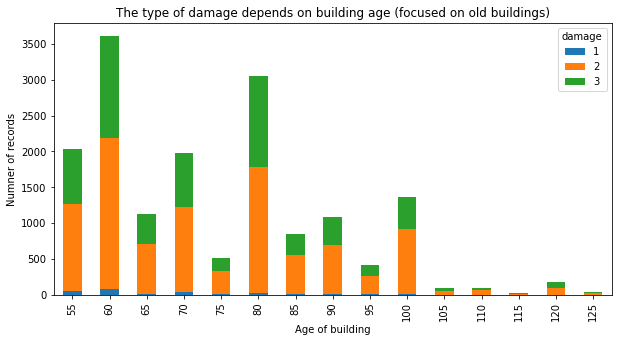

In [78]:
plt.rcParams["figure.figsize"] = (10,5)
data_age_1=data[data['age']>50]
data_age=data_age_1[data_age_1['age']<130]

a=data_age.groupby(['age','damage']).size().reset_index()
b=a.pivot(index='age',columns='damage',values=0).reset_index()
b.set_index('age',inplace=True)
b.plot(kind='bar',stacked=True,title='The type of damage depends on building age (focused on old buildings)');
plt.xlabel('Age of building')
plt.ylabel('Numner of records')


#### Number of floors distribution

Text(0, 0.5, 'Numner of records')

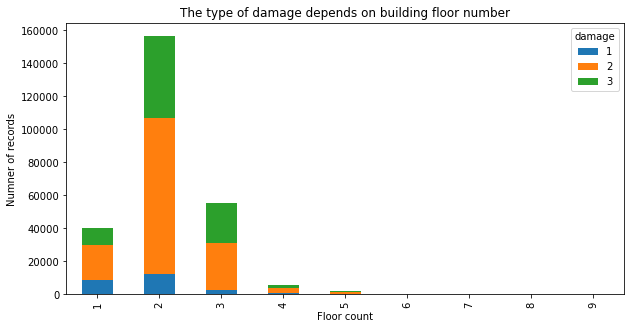

In [79]:
a=data.groupby(['count_floors_pre_eq','damage']).size().reset_index()
b=a.pivot(index='count_floors_pre_eq',columns='damage',values=0).reset_index()
b.set_index('count_floors_pre_eq',inplace=True)

plt.rcParams["figure.figsize"] = (10,5)
b.plot(kind='bar',stacked=True,title='The type of damage depends on building floor number');
plt.xlabel('Floor count')
plt.ylabel('Numner of records')


#### Heigth distribution

Text(0, 0.5, 'Numner of records')

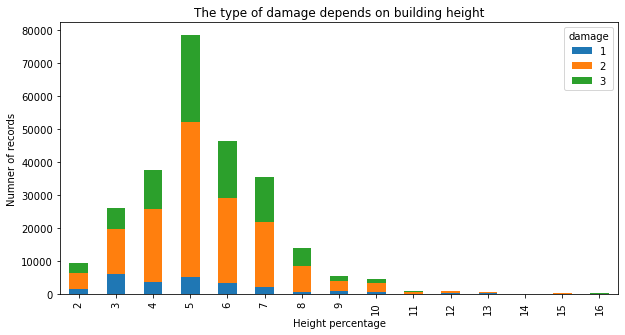

In [82]:
data_heigth=data[data['height_percentage']<17]

a=data_heigth.groupby(['height_percentage','damage']).size().reset_index()
b=a.pivot(index='height_percentage',columns='damage',values=0).reset_index()
b.set_index('height_percentage',inplace=True)

plt.rcParams["figure.figsize"] = (10,5)
b.plot(kind='bar',stacked=True,title='The type of damage depends on building height');
plt.xlabel('Height percentage')
plt.ylabel('Numner of records')

##### Materials used distrubution

In [83]:
# list of structure related colmns
cols=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

# melt the columns
datamelt=data.melt(id_vars=['age','damage'],value_vars=cols).rename(columns={'variable':'structure','value':'count'})

# Group by age, damage and structure
damageByStructure=datamelt.groupby(['damage','structure']).agg({'count':'sum'})

damageByStructure.reset_index(inplace=True)


In [84]:
damageByStructure.sort_values(by='count', ascending=False,inplace=True)

Text(0.5, 1.0, 'Distribution of main structure type')

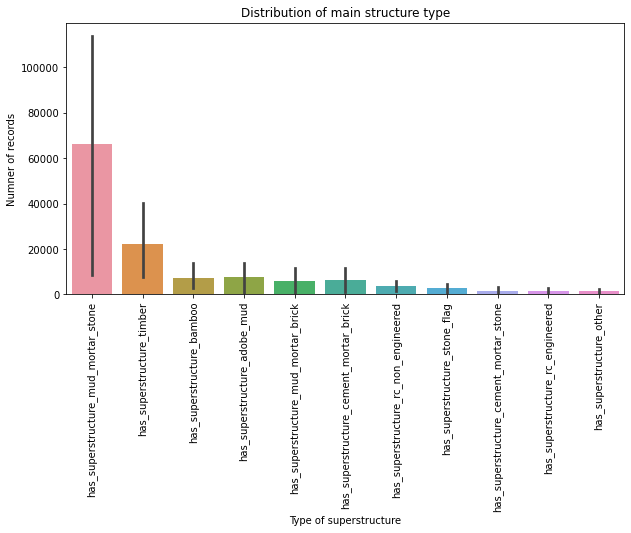

In [37]:
sb.barplot(x='structure',y='count',data=damageByStructure)
plt.xticks(rotation=90)
plt.xlabel('Type of superstructure')
plt.ylabel('Numner of records')
plt.title('Distribution of main structure type')

#### Area distribution

Text(0.5, 1.0, 'he type of damage depends on building area')

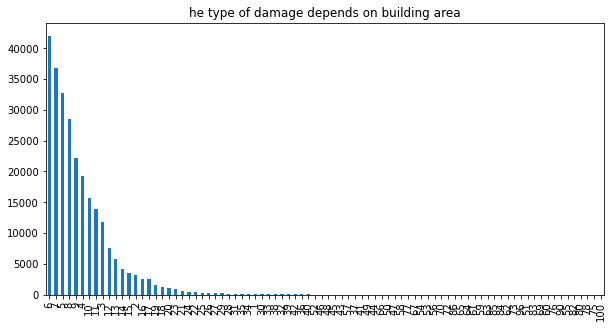

In [85]:
plt.rcParams["figure.figsize"] = (10,5)
data['area_percentage'].value_counts().plot.bar()
plt.title('he type of damage depends on building area')

Text(0, 0.5, 'Numner of records')

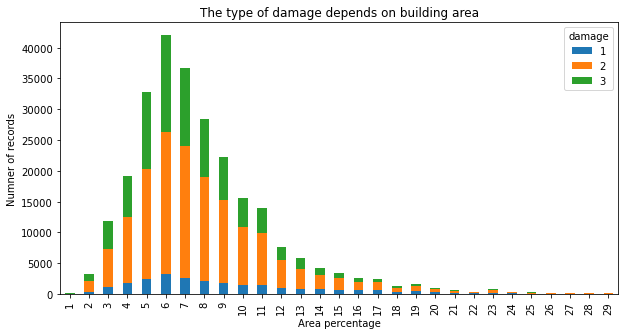

In [86]:
#filter data
data_age=data[data['area_percentage']<30]

a=data_age.groupby(['area_percentage','damage']).size().reset_index()
b=a.pivot(index='area_percentage',columns='damage',values=0).reset_index()
b.set_index('area_percentage',inplace=True)

plt.rcParams["figure.figsize"] = (10,5)
b.plot(kind='bar',stacked=True,title='The type of damage depends on building area');
plt.xlabel('Area percentage')
plt.ylabel('Numner of records')

#### Heigth-area ratio distribution

In [87]:
heigth_area_ratio = data['height_percentage'] / data['area_percentage']

data['heigth_area_ratio']=heigth_area_ratio.round(1)

data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage,heigth_area_ratio
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,3,0.8
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,2,0.9
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,3,1.0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,2,0.8
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,3,1.1


In [88]:
max(data['heigth_area_ratio'])

16.0

In [89]:
min(data['heigth_area_ratio'])

0.0

<AxesSubplot:>

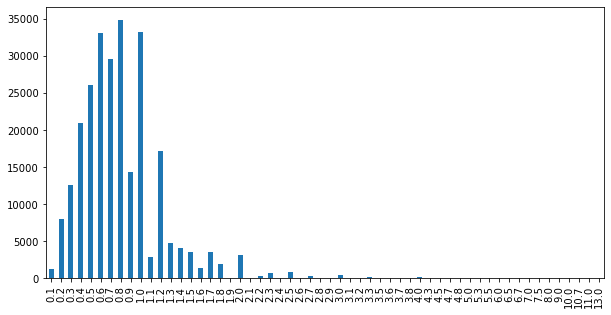

In [90]:
#filter data
max(data['heigth_area_ratio'])
data_ratio_1=data[data['heigth_area_ratio']<16]
data_ratio=data_ratio_1[data_ratio_1['heigth_area_ratio']>0]

data_ratio['heigth_area_ratio'].value_counts().sort_index().plot.bar()


Text(0, 0.5, 'Numner of records')

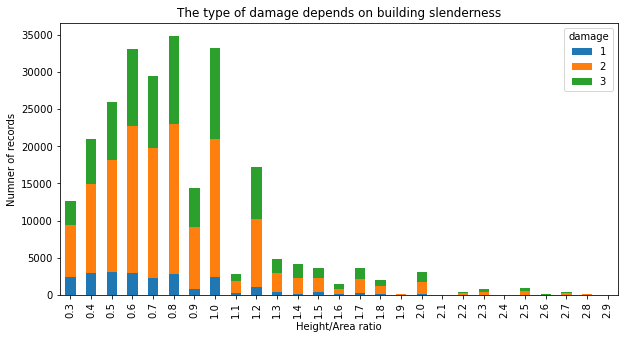

In [94]:
#filter data
data_ratio_1=data[data['heigth_area_ratio']<3]
data_ratio=data_ratio_1[data_ratio_1['heigth_area_ratio']>0.2]

a=data_ratio.groupby(['heigth_area_ratio','damage']).size().reset_index()
b=a.pivot(index='heigth_area_ratio',columns='damage',values=0).reset_index()
b.set_index('heigth_area_ratio',inplace=True)

plt.rcParams["figure.figsize"] = (10,5)
b.plot(kind='bar',stacked=True,title='The type of damage depends on building slenderness');
plt.xlabel('Height/Area ratio')
plt.ylabel('Numner of records')

# Step 3: Analyze the correlation among variables 

<AxesSubplot:>

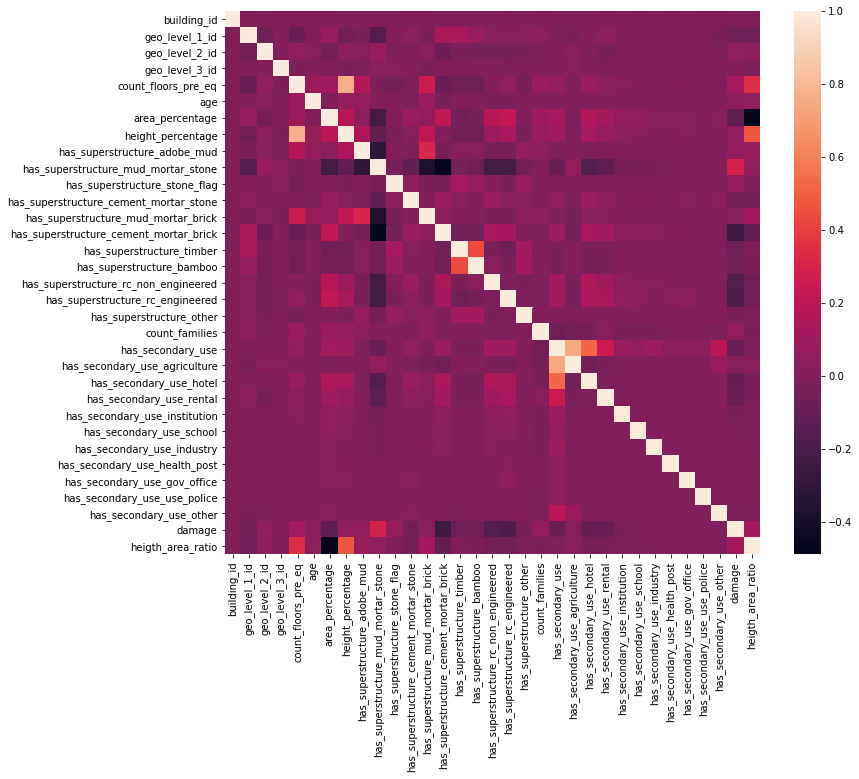

In [51]:
plt.rcParams["figure.figsize"] = (12,10)
sb.heatmap(data.corr())

# Step 3: Classification task

In [95]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [96]:
train_val = data
train_val.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage,heigth_area_ratio
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,3,0.8
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,2,0.9
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,3,1.0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,2,0.8
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,3,1.1


In [97]:
train_val.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage,heigth_area_ratio
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272,0.817044
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814,0.511360
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.500000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.700000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,16.000000


In [98]:
X = train_val.loc[:, train_val.columns != 'damage_grade']
y = train_val.loc[:, train_val.columns == 'damage_grade']
# Define X and y variables
X=pd.get_dummies(data.loc[:,:'has_secondary_use_other'])
y=data['damage'].astype(int)

In [99]:
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier()
]

In [166]:
def model_and_test(X, y, classifiers):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 35)
    
    for model in classifiers:
        this_model = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        

        print(f'{this_model} f1 score:')
        score = f1_score(y_test, y_pred, average='micro')
        print(f'{score:.4f}')
        print('\n')

In [167]:
model_and_test(X, y, classifiers)

KNeighborsClassifier f1 score:
0.4946


DecisionTreeClassifier f1 score:
0.6486




### Feature

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 35)
    
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'{model} f1 score:')
score = f1_score(y_test, y_pred, average='micro')
print(f'{score:.4f}')
print('\n')

DecisionTreeClassifier() f1 score:
0.6484




In [159]:
important_features = pd.DataFrame(model.feature_importances_, index = X_train.columns,
columns = ['importance']).sort_values('importance', ascending=False)

In [177]:
important_features.iloc[1:16]

,importance
geo_level_1_id,0.142596
geo_level_2_id,0.109629
geo_level_3_id,0.102634
age,0.082086
area_percentage,0.081816
height_percentage,0.041943
foundation_type_r,0.039917
count_families,0.018907
has_superstructure_mud_mortar_stone,0.015653
count_floors_pre_eq,0.012627


### Confusion matrix

In [178]:
from sklearn.metrics import confusion_matrix
result_kclf = confusion_matrix(y_pred, y_test)
pd.DataFrame(result_kclf)


,0,1,2
0,1233,1158,179
1,1088,10254,3203
2,186,3350,5410


Text(69.0, 0.5, 'y_test')

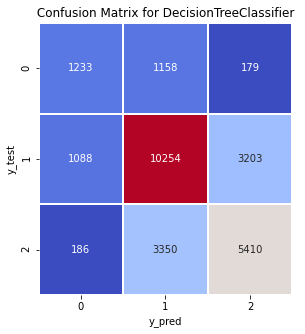

In [179]:
plt.subplot(1,2,1)
plt.title(" Confusion Matrix for DecisionTreeClassifier ")
sb.heatmap(result_kclf,annot=True, cmap="coolwarm", linewidth=1, fmt="d",cbar=False)

plt.xlabel('y_pred')
plt.ylabel('y_test')
